# Análisis Exploratorio de Datos y Depuración
# Recaudo de Rentas Cedidas - Series de Tiempo 2026

---

## 📊 Objetivo

Este cuaderno implementa el **diagnóstico completo y depuración estructural** de los datos de recaudo para preparar el modelado predictivo con técnicas de series de tiempo de última generación (2026).

### Alcance del Análisis:
1. **Exploración inicial**: Estructura, dimensiones, tipos de datos
2. **Diagnóstico de calidad**: Valores faltantes, duplicados, inconsistencias
3. **Identificación de anomalías**: Outliers extremos, valores negativos, transacciones en escala cero
4. **Depuración estructural**: Limpieza, normalización, validación de integridad
5. **Análisis temporal**: Rangos, gaps, estacionalidad preliminar

---

**Autor**: Sistema de Análisis Predictivo  
**Fecha**: Febrero 2026  
**Versión**: 1.0

## 1. Configuración del Entorno

In [1]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# Importar bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
from datetime import datetime
import missingno as msno
from scipy import stats
from sklearn.ensemble import IsolationForest

# Configuración de visualización
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

# Configuración de pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', '{:.2f}'.format)

print("✅ Bibliotecas cargadas exitosamente")
print(f"📅 Fecha de ejecución: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")

✅ Bibliotecas cargadas exitosamente
📅 Fecha de ejecución: 2026-02-13 02:59:16


## 2. Carga de Datos

In [3]:
# Cargar datos desde Excel
print("📁 Cargando datos de BaseRentasCedidas...")
df_raw = pd.read_excel('../BaseRentasCedidas (1).xlsx')

print(f"\n✅ Datos cargados exitosamente")
print(f"📊 Dimensiones: {df_raw.shape[0]:,} filas × {df_raw.shape[1]} columnas")
print(f"💾 Memoria utilizada: {df_raw.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

📁 Cargando datos de BaseRentasCedidas...

✅ Datos cargados exitosamente
📊 Dimensiones: 227,056 filas × 28 columnas
💾 Memoria utilizada: 294.77 MB


## 3. Exploración Inicial de Estructura

In [4]:
# Información general del dataset
print("=" * 80)
print("INFORMACIÓN GENERAL DEL DATASET")
print("=" * 80)
df_raw.info()

print("\n" + "=" * 80)
print("PRIMERAS 10 FILAS")
print("=" * 80)
display(df_raw.head(10))

print("\n" + "=" * 80)
print("COLUMNAS DISPONIBLES")
print("=" * 80)
for i, col in enumerate(df_raw.columns, 1):
    print(f"{i:2d}. {col}")

INFORMACIÓN GENERAL DEL DATASET
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227056 entries, 0 to 227055
Data columns (total 28 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0     Vigencia                     227056 non-null  int64         
 1     MesNombreCalendario          227056 non-null  object        
 2     FechaRecaudo                 227056 non-null  datetime64[ns]
 3     NumeroCuentaBancaria         227056 non-null  object        
 4     NombreCuentaBancaria         227056 non-null  object        
 5     NombreBanco                  227056 non-null  object        
 6     NitBeneficiarioAportante     227056 non-null  object        
 7     NombreBeneficiarioAportante  227056 non-null  object        
 8     ValorRecaudo                 227056 non-null  object        
 9     CódigoRubroPptal             227056 non-null  object        
 10    Nombre de Rubro              22705

,Vigencia,MesNombreCalendario,FechaRecaudo,NumeroCuentaBancaria,NombreCuentaBancaria,NombreBanco,NitBeneficiarioAportante,NombreBeneficiarioAportante,ValorRecaudo,CódigoRubroPptal,Nombre de Rubro,CódigoGrupoFuente,NombreGrupoFuente,CódigoSubGrupoFuente,NombreSubGrupoFuente,CódigoConcepto,NombreConcepto,CódigoTipoRegistro,TipoRegistro,Responsable,CantidadOperaciones,ID_Transacción,Grupo_Aportante,Cant_Gr_Aport,Nombre_Grupo_Aportante,SubGrupo_Aportante,Cant_SubGr_Aport,Nombre_SubGrupo_Aportante
0,2020,Enero,2020-01-02,513845701,IMPUESTO CONSUMO LICORES VINOS APERITIVOS Y SI...,BANCO DE OCCIDENTE,891680010,Departamento CHOCÓ,60000000,1-02-6-04-01-14-01,Recursos Departamentales y Distritales para As...,11,ADMINISTRACIÓN DE RENTAS CEDIDAS DE LOS ENTES ...,114,"Impoconsumo Licores, Vinos, Aperitivos y Simil...",1102-20,Licores Y Alcohol (Licores Vinos Aperitivos Si...,1102-20-01,Recaudo,Paula P.,1,4443,2,1,Régimen Subsidiado,21,1,Entidades Territoriales
1,2020,Enero,2020-01-02,513845644,IMPUESTO CONSUMO CERVEZAS SIFONES Y REFAJOS,BANCO DE OCCIDENTE,891680010,Departamento CHOCÓ,10000000,1-02-6-04-01-14-01,Recursos Departamentales y Distritales para As...,11,ADMINISTRACIÓN DE RENTAS CEDIDAS DE LOS ENTES ...,113,Impoconsumo Cervezas y Sifones,1102-07,Impoconsumo De Cerveza (Iva Del 8% Cerveza) Nal.,1102-07-01,Recaudo,Paula P.,1,4444,2,1,Régimen Subsidiado,21,1,Entidades Territoriales
2,2020,Enero,2020-01-02,513845701,IMPUESTO CONSUMO LICORES VINOS APERITIVOS Y SI...,BANCO DE OCCIDENTE,891680010,Departamento CHOCÓ,2577235,1-02-6-04-01-14-01,Recursos Departamentales y Distritales para As...,11,ADMINISTRACIÓN DE RENTAS CEDIDAS DE LOS ENTES ...,114,"Impoconsumo Licores, Vinos, Aperitivos y Simil...",1102-20,Licores Y Alcohol (Licores Vinos Aperitivos Si...,1102-20-01,Recaudo,Paula P.,1,4445,2,1,Régimen Subsidiado,21,1,Entidades Territoriales
3,2020,Enero,2020-01-02,513845701,IMPUESTO CONSUMO LICORES VINOS APERITIVOS Y SI...,BANCO DE OCCIDENTE,891680010,Departamento CHOCÓ,8528870,1-02-6-04-01-14-01,Recursos Departamentales y Distritales para As...,11,ADMINISTRACIÓN DE RENTAS CEDIDAS DE LOS ENTES ...,114,"Impoconsumo Licores, Vinos, Aperitivos y Simil...",1102-20,Licores Y Alcohol (Licores Vinos Aperitivos Si...,1102-20-01,Recaudo,Paula P.,1,4446,2,1,Régimen Subsidiado,21,1,Entidades Territoriales
4,2020,Enero,2020-01-02,513845701,IMPUESTO CONSUMO LICORES VINOS APERITIVOS Y SI...,BANCO DE OCCIDENTE,891580016,Departamento CAUCA,559944125,1-02-6-04-01-14-01,Recursos Departamentales y Distritales para As...,11,ADMINISTRACIÓN DE RENTAS CEDIDAS DE LOS ENTES ...,114,"Impoconsumo Licores, Vinos, Aperitivos y Simil...",1102-25,Monopolio De Licores Destilados Nal,1102-25-01,Recaudo,Paula P.,1,4447,2,1,Régimen Subsidiado,21,1,Entidades Territoriales
5,2020,Enero,2020-01-02,513845701,IMPUESTO CONSUMO LICORES VINOS APERITIVOS Y SI...,BANCO DE OCCIDENTE,891680010,Departamento CHOCÓ,140000000,1-02-6-04-01-14-01,Recursos Departamentales y Distritales para As...,11,ADMINISTRACIÓN DE RENTAS CEDIDAS DE LOS ENTES ...,114,"Impoconsumo Licores, Vinos, Aperitivos y Simil...",1102-20,Licores Y Alcohol (Licores Vinos Aperitivos Si...,1102-20-01,Recaudo,Paula P.,1,4448,2,1,Régimen Subsidiado,21,1,Entidades Territoriales
6,2020,Enero,2020-01-02,513845701,IMPUESTO CONSUMO LICORES VINOS APERITIVOS Y SI...,BANCO DE OCCIDENTE,891680010,Departamento CHOCÓ,70000000,1-02-6-04-01-14-01,Recursos Departamentales y Distritales para As...,11,ADMINISTRACIÓN DE RENTAS CEDIDAS DE LOS ENTES ...,114,"Impoconsumo Licores, Vinos, Aperitivos y Simil...",1102-20,Licores Y Alcohol (Licores Vinos Aperitivos Si...,1102-20-01,Recaudo,Paula P.,1,4449,2,1,Régimen Subsidiado,21,1,Entidades Territoriales
7,2020,Enero,2020-01-02,513845701,IMPUESTO CONSUMO LICORES VINOS APERITIVOS Y SI...,BANCO DE OCCIDENTE,891580016,Departamento CAUCA,67872709,1-02-6-04-01-14-01,Recursos Departamentales y Distritales para As...,11,ADMINISTRACIÓN DE RENTAS CEDIDAS DE LOS ENTES ...,114,"Impoconsumo Licores, Vinos, 


COLUMNAS DISPONIBLES
 1.   Vigencia
 2.   MesNombreCalendario
 3.   FechaRecaudo
 4.   NumeroCuentaBancaria
 5.   NombreCuentaBancaria
 6.   NombreBanco
 7.   NitBeneficiarioAportante
 8.   NombreBeneficiarioAportante
 9.   ValorRecaudo
10.   CódigoRubroPptal
11.   Nombre de Rubro
12.   CódigoGrupoFuente
13.   NombreGrupoFuente
14.   CódigoSubGrupoFuente
15.   NombreSubGrupoFuente
16.   CódigoConcepto
17.   NombreConcepto
18.   CódigoTipoRegistro
19.   TipoRegistro
20.   Responsable
21.   CantidadOperaciones
22.   ID_Transacción
23.   Grupo_Aportante
24.   Cant_Gr_Aport
25.   Nombre_Grupo_Aportante
26.   SubGrupo_Aportante
27.   Cant_SubGr_Aport
28.   Nombre_SubGrupo_Aportante


# Identificar columnas con datos temporales y de recaudo
columnas_temporales = [col for col in df_raw.columns if any(x in col.lower() for x in ['vigencia', 'fecha', 'periodo', 'año', 'mes'])]
columnas_recaudo = [col for col in df_raw.columns if any(x in col.lower() for x in ['valor', 'monto', 'ingreso'])]
# Nota: Se removió 'recaudo' del filtro de recaudo para evitar que 'FechaRecaudo' aparezca como columna de recaudo

print("🗓️  COLUMNAS TEMPORALES DETECTADAS:")
for col in columnas_temporales:
    print(f"  - {col}")
    if col in df_raw.columns:
        print(f"    Valores únicos: {df_raw[col].nunique()}")
        print(f"    Rango: {df_raw[col].min()} - {df_raw[col].max()}")
        print(f"    Tipo: {df_raw[col].dtype}")
        # Diagnóstico especial para MesNombreCalendario
        if 'mes' in col.lower() and df_raw[col].dtype == 'object':
            valores = df_raw[col].unique()
            print(f"    ⚠️  Valores encontrados ({len(valores)}): {sorted(valores)}")
            # Normalizar a título (ej: "Enero") para ver cuántos meses reales hay
            meses_normalizados = df_raw[col].str.strip().str.capitalize().nunique()
            print(f"    ✅ Meses reales (tras normalizar capitalización): {meses_normalizados}")
        print()

print("\n💰 COLUMNAS DE RECAUDO DETECTADAS:")
for col in columnas_recaudo:
    print(f"  - {col}")
    if col in df_raw.columns:
        print(f"    Valores no nulos: {df_raw[col].notna().sum():,} ({df_raw[col].notna().sum()/len(df_raw)*100:.1f}%)")
        print(f"    Tipo: {df_raw[col].dtype}")
        # Alerta si el tipo no es numérico
        if df_raw[col].dtype == 'object':
            print(f"    ⚠️  ALERTA: Esta columna es tipo texto. Requiere conversión a numérico.")
            print(f"    Muestra de valores: {df_raw[col].head(5).tolist()}")
        print()

In [5]:
# ===== LIMPIEZA PREVENTIVA =====
# 1. Normalizar MesNombreCalendario (corregir capitalización inconsistente)
if '  MesNombreCalendario' in df_raw.columns:
    col_mes = '  MesNombreCalendario'
elif 'MesNombreCalendario' in df_raw.columns:
    col_mes = 'MesNombreCalendario'
else:
    col_mes = [c for c in df_raw.columns if 'mes' in c.lower() and 'nombre' in c.lower()]
    col_mes = col_mes[0] if col_mes else None

if col_mes:
    antes = df_raw[col_mes].nunique()
    df_raw[col_mes] = df_raw[col_mes].str.strip().str.capitalize()
    despues = df_raw[col_mes].nunique()
    print(f"✅ '{col_mes}' normalizado: {antes} valores únicos → {despues} valores únicos")
    print(f"   Meses resultantes: {sorted(df_raw[col_mes].unique())}")

# 2. Convertir ValorRecaudo de texto a numérico
if '  ValorRecaudo' in df_raw.columns:
    col_valor = '  ValorRecaudo'
elif 'ValorRecaudo' in df_raw.columns:
    col_valor = 'ValorRecaudo'
else:
    col_valor = [c for c in df_raw.columns if 'valor' in c.lower() and 'recaudo' in c.lower()]
    col_valor = col_valor[0] if col_valor else None

if col_valor and df_raw[col_valor].dtype == 'object':
    print(f"\n🔧 Convirtiendo '{col_valor}' de texto a numérico...")
    # Limpiar: quitar $, espacios, puntos de miles, reemplazar coma decimal
    df_raw[col_valor] = (
        df_raw[col_valor]
        .astype(str)
        .str.replace('$', '', regex=False)
        .str.replace(' ', '', regex=False)
        .str.strip()
    )
    df_raw[col_valor] = pd.to_numeric(df_raw[col_valor], errors='coerce')
    nulos_creados = df_raw[col_valor].isna().sum()
    print(f"✅ '{col_valor}' convertido a {df_raw[col_valor].dtype}")
    if nulos_creados > 0:
        print(f"⚠️  {nulos_creados:,} valores no pudieron convertirse (quedaron como NaN)")
    else:
        print(f"✅ Todos los valores convertidos exitosamente")
    print(f"   Rango: {df_raw[col_valor].min():,.2f} - {df_raw[col_valor].max():,.2f}")

✅ '  MesNombreCalendario' normalizado: 26 valores únicos → 12 valores únicos
   Meses resultantes: ['Abril', 'Agosto', 'Diciembre', 'Enero', 'Febrero', 'Julio', 'Junio', 'Marzo', 'Mayo', 'Noviembre', 'Octubre', 'Septiembre']

🔧 Convirtiendo '  ValorRecaudo' de texto a numérico...
✅ '  ValorRecaudo' convertido a float64
⚠️  1 valores no pudieron convertirse (quedaron como NaN)
   Rango: -4,032,716,023.89 - 76,580,000,000.00


## 5. Diagnóstico de Calidad de Datos

ANÁLISIS DE VALORES FALTANTES


,Columna,Valores_Faltantes,Porcentaje
Responsable,Responsable,1046,0.46
ValorRecaudo,ValorRecaudo,1,0.00
Nombre de Rubro,Nombre de Rubro,1,0.00


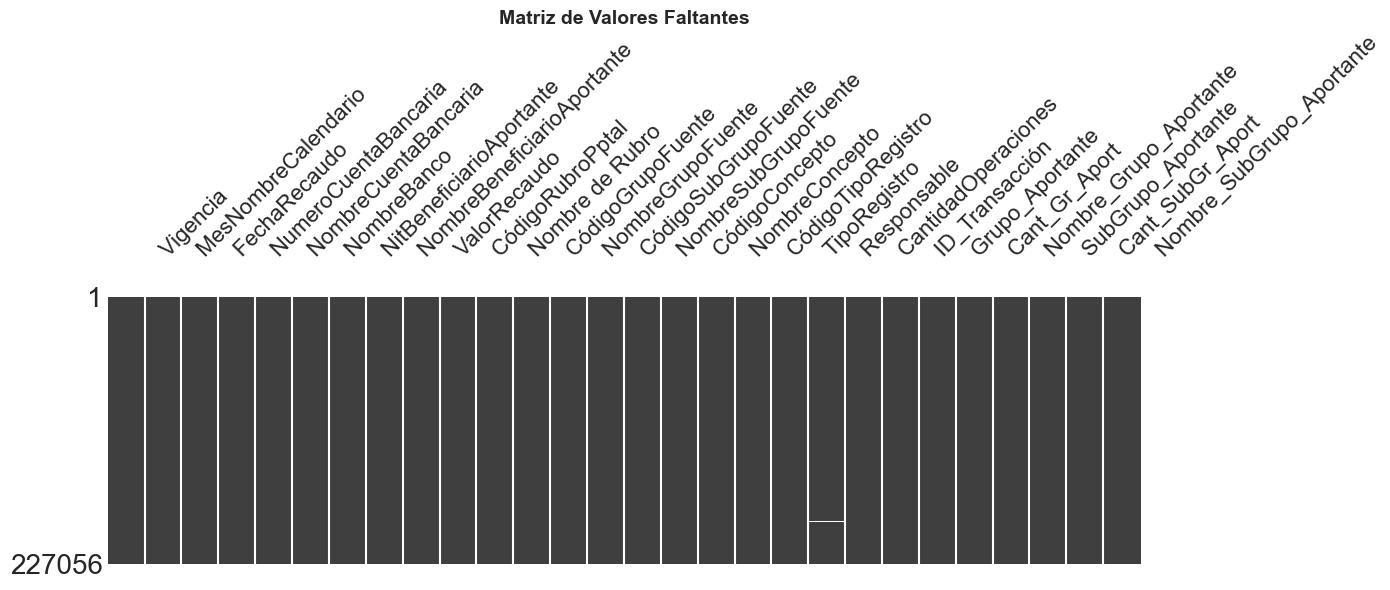

In [9]:
# Análisis de valores faltantes
print("=" * 80)
print("ANÁLISIS DE VALORES FALTANTES")
print("=" * 80)

missing_data = pd.DataFrame({
    'Columna': df_raw.columns,
    'Valores_Faltantes': df_raw.isnull().sum(),
    'Porcentaje': (df_raw.isnull().sum() / len(df_raw) * 100).round(2)
}).sort_values('Porcentaje', ascending=False)

missing_data = missing_data[missing_data['Valores_Faltantes'] > 0]

if len(missing_data) > 0:
    display(missing_data)
    
    # Visualización con missingno
    fig, ax = plt.subplots(figsize=(14, 6))
    msno.matrix(df_raw, ax=ax, sparkline=False)
    plt.title('Matriz de Valores Faltantes', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()
else:
    print("✅ No se detectaron valores faltantes")

In [10]:
# Análisis de duplicados
print("=" * 80)
print("ANÁLISIS DE REGISTROS DUPLICADOS")
print("=" * 80)

duplicados_totales = df_raw.duplicated().sum()
print(f"Duplicados completos: {duplicados_totales:,} ({duplicados_totales/len(df_raw)*100:.2f}%)")

if duplicados_totales > 0:
    print("\n⚠️  Se detectaron registros duplicados que requieren revisión")
else:
    print("✅ No se detectaron duplicados completos")

ANÁLISIS DE REGISTROS DUPLICADOS
Duplicados completos: 0 (0.00%)
✅ No se detectaron duplicados completos


## 6. Preparación de Datos para Análisis Temporal

**NOTA IMPORTANTE**: Esta sección debe ajustarse según las columnas reales del dataset.  
Asumimos que existe una columna de `Vigencia` (año) y una columna de valor de recaudo.

In [11]:
# TODO: AJUSTAR NOMBRES DE COLUMNAS SEGÚN DATASET REAL

# Verificar si existen columnas clave
if columnas_recaudo:
    columna_recaudo = columnas_recaudo[0]  # Tomar la primera columna detectada
    print(f"✅ Usando columna de recaudo: '{columna_recaudo}'")
else:
    print("⚠️  No se detectó automáticamente la columna de recaudo")
    print("Por favor, especificar manualmente en la siguiente celda")
    columna_recaudo = None

if columnas_temporales:
    columna_temporal = columnas_temporales[0]  # Tomar la primera columna detectada
    print(f"✅ Usando columna temporal: '{columna_temporal}'")
else:
    print("⚠️  No se detectó automáticamente la columna temporal")
    print("Por favor, especificar manualmente en la siguiente celda")
    columna_temporal = None

NameError: name 'columnas_recaudo' is not defined

## 7. Análisis Estadístico de la Variable Objetivo (Recaudo)

In [8]:
if columna_recaudo and columna_recaudo in df_raw.columns:
    print("=" * 80)
    print(f"ESTADÍSTICAS DESCRIPTIVAS: {columna_recaudo}")
    print("=" * 80)
    
    # Filtrar valores numéricos válidos
    recaudo_valido = df_raw[columna_recaudo].replace([np.inf, -np.inf], np.nan).dropna()
    
    if len(recaudo_valido) > 0:
        estadisticas = recaudo_valido.describe()
        print(estadisticas)
        
        # Estadísticas adicionales
        print(f"\n📊 ESTADÍSTICAS ADICIONALES:")
        print(f"  Mediana: ${recaudo_valido.median():,.2f}")
        print(f"  Moda: ${recaudo_valido.mode()[0]:,.2f}")
        print(f"  Coef. Variación: {(recaudo_valido.std()/recaudo_valido.mean()*100):.2f}%")
        print(f"  Asimetría (Skewness): {recaudo_valido.skew():.2f}")
        print(f"  Curtosis: {recaudo_valido.kurtosis():.2f}")
        
        # Identificar valores negativos
        negativos = (recaudo_valido < 0).sum()
        print(f"\n⚠️  Valores negativos: {negativos:,} ({negativos/len(recaudo_valido)*100:.2f}%)")
        
        # Identificar valores cercanos a cero
        cerca_cero = ((recaudo_valido >= 0) & (recaudo_valido < 1000)).sum()
        print(f"📉 Valores < $1,000: {cerca_cero:,} ({cerca_cero/len(recaudo_valido)*100:.2f}%)")
        
        # Identificar outliers extremos (>800M según plan)
        outliers_extremos = (recaudo_valido > 8e8).sum()
        print(f"🚨 Valores > $800M: {outliers_extremos:,} ({outliers_extremos/len(recaudo_valido)*100:.2f}%)")
    else:
        print("⚠️  No hay valores válidos para analizar")
else:
    print("⚠️  Columna de recaudo no identificada")

ESTADÍSTICAS DESCRIPTIVAS:   FechaRecaudo
count                           227056
mean     2022-09-15 12:08:42.077372928
min                2020-01-02 00:00:00
25%                2021-01-18 00:00:00
50%                2022-08-05 00:00:00
75%                2024-03-13 00:00:00
max                2025-10-31 00:00:00
Name:   FechaRecaudo, dtype: object

📊 ESTADÍSTICAS ADICIONALES:
  Mediana: $,.2f
  Moda: $,.2f


TypeError: unsupported operand type(s) for /: 'Timedelta' and 'Timestamp'

## 8. Visualización de Distribución de Recaudo

In [ ]:
if columna_recaudo and columna_recaudo in df_raw.columns:
    recaudo_valido = df_raw[columna_recaudo].replace([np.inf, -np.inf], np.nan).dropna()
    
    if len(recaudo_valido) > 0:
        fig = make_subplots(
            rows=2, cols=2,
            subplot_titles=('Distribución de Recaudo', 'Distribución Log-Normal',
                          'Box Plot', 'Densidad de Probabilidad'),
            specs=[[{}, {}], [{}, {}]]
        )
        
        # Histograma normal
        fig.add_trace(
            go.Histogram(x=recaudo_valido, name='Recaudo', nbinsx=50),
            row=1, col=1
        )
        
        # Histograma logarítmico
        recaudo_positivo = recaudo_valido[recaudo_valido > 0]
        fig.add_trace(
            go.Histogram(x=np.log10(recaudo_positivo), name='Log10(Recaudo)', nbinsx=50),
            row=1, col=2
        )
        
        # Box plot
        fig.add_trace(
            go.Box(y=recaudo_valido, name='Recaudo'),
            row=2, col=1
        )
        
        # Densidad
        from scipy.stats import gaussian_kde
        if len(recaudo_positivo) > 1:
            kde = gaussian_kde(recaudo_positivo.sample(min(10000, len(recaudo_positivo))))
            x_range = np.linspace(recaudo_positivo.min(), recaudo_positivo.quantile(0.99), 100)
            fig.add_trace(
                go.Scatter(x=x_range, y=kde(x_range), mode='lines', name='Densidad'),
                row=2, col=2
            )
        
        fig.update_layout(height=800, showlegend=False, title_text="Análisis de Distribución del Recaudo")
        fig.show()

TypeError: Invalid comparison between dtype=datetime64[ns] and int

## 9. Detección de Outliers con Isolation Forest

In [ ]:
if columna_recaudo and columna_recaudo in df_raw.columns:
    recaudo_valido = df_raw[columna_recaudo].replace([np.inf, -np.inf], np.nan).dropna()
    
    if len(recaudo_valido) > 100:
        print("🔍 Detectando outliers con Isolation Forest...")
        
        # Preparar datos
        X = recaudo_valido.values.reshape(-1, 1)
        
        # Entrenar modelo
        iso_forest = IsolationForest(contamination=0.05, random_state=42)
        outlier_labels = iso_forest.fit_predict(X)
        
        # Contar outliers
        n_outliers = (outlier_labels == -1).sum()
        print(f"\n⚠️  Outliers detectados: {n_outliers:,} ({n_outliers/len(recaudo_valido)*100:.2f}%)")
        
        # Valores extremos
        outliers = recaudo_valido[outlier_labels == -1]
        print(f"\nTop 10 outliers más extremos:")
        print(outliers.nlargest(10).apply(lambda x: f"${x:,.2f}"))

🔍 Detectando outliers con Isolation Forest...

⚠️  Outliers detectados: 10,984 (4.84%)

Top 10 outliers más extremos:
224551    $,.2f
224552    $,.2f
224553    $,.2f
224554    $,.2f
224555    $,.2f
224556    $,.2f
224557    $,.2f
224558    $,.2f
224559    $,.2f
224560    $,.2f
Name:   FechaRecaudo, dtype: object


## 10. Análisis Temporal Preliminar

Explorar cómo se distribuye el recaudo a lo largo del tiempo

In [ ]:
# Este código necesita ajustarse según la estructura real de los datos
# Por ahora, dejamos placeholder para completar una vez se explore el dataset

print("⏳ Este análisis se completará una vez se identifique la estructura temporal de los datos")
print("\nPróximos pasos:")
print("1. Identificar columnas de fecha/periodo")
print("2. Agregar recaudo por periodo (mensual/trimestral/semestral)")
print("3. Analizar estacionalidad y tendencias")
print("4. Identificar gaps temporales")

⏳ Este análisis se completará una vez se identifique la estructura temporal de los datos

Próximos pasos:
1. Identificar columnas de fecha/periodo
2. Agregar recaudo por periodo (mensual/trimestral/semestral)
3. Analizar estacionalidad y tendencias
4. Identificar gaps temporales


## 11. Resumen Ejecutivo de Diagnóstico

### Hallazgos Críticos Identificados

In [ ]:
print("=" * 80)
print("RESUMEN EJECUTIVO - DIAGNÓSTICO DE DATOS")
print("=" * 80)

print("\n📊 DIMENSIONES:")
print(f"  Registros totales: {len(df_raw):,}")
print(f"  Columnas: {df_raw.shape[1]}")

if columna_recaudo and columna_recaudo in df_raw.columns:
    recaudo_valido = df_raw[columna_recaudo].replace([np.inf, -np.inf], np.nan).dropna()
    
    print("\n⚠️  PROBLEMAS DETECTADOS:")
    
    # Valores negativos
    negativos = (recaudo_valido < 0).sum()
    if negativos > 0:
        print(f"  ❌ Valores negativos: {negativos:,} registros")
    
    # Valores extremos
    extremos = (recaudo_valido > 8e8).sum()
    if extremos > 0:
        print(f"  🚨 Outliers extremos (>$800M): {extremos:,} registros")
    
    # Valores cercanos a cero
    cerca_cero = ((recaudo_valido >= 0) & (recaudo_valido < 1000)).sum()
    if cerca_cero > 10000:
        print(f"  📉 Transacciones en escala cero (<$1,000): {cerca_cero:,} registros")
    
    print("\n✅ ACCIONES REQUERIDAS:")
    print("  1. Auditar y corregir valores negativos")
    print("  2. Aplicar Winsorization/Capping a outliers extremos")
    print("  3. Filtrar o normalizar transacciones de bajo valor")
    print("  4. Validar integridad temporal")
    print("  5. Preparar agregaciones por horizonte temporal")

print("\n" + "=" * 80)

RESUMEN EJECUTIVO - DIAGNÓSTICO DE DATOS

📊 DIMENSIONES:
  Registros totales: 227,056
  Columnas: 28

⚠️  PROBLEMAS DETECTADOS:


TypeError: Invalid comparison between dtype=datetime64[ns] and int

## 12. Exportar Datos para Siguiente Fase

Guardar datos crudos para continuar con Feature Engineering

In [ ]:
# Guardar copia de datos originales
output_path = '../data/raw/datos_originales.parquet'
df_raw.to_parquet(output_path, index=False)
print(f"✅ Datos originales guardados en: {output_path}")

print("\n📋 SIGUIENTE PASO:")
print("   Abrir cuaderno: 02_Feature_Engineering.ipynb")

ArrowInvalid: ("Could not convert 'Ajuste Contable - Presupuestal' with type str: tried to convert to int64", 'Conversion failed for column \u2003\u2003NumeroCuentaBancaria with type object')